In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv('Iris.csv')

In [3]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [5]:
df = pd.get_dummies(df,columns=['Species'])

In [6]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species_Iris-setosa,Species_Iris-versicolor,Species_Iris-virginica
0,1,5.1,3.5,1.4,0.2,True,False,False
1,2,4.9,3.0,1.4,0.2,True,False,False
2,3,4.7,3.2,1.3,0.2,True,False,False
3,4,4.6,3.1,1.5,0.2,True,False,False
4,5,5.0,3.6,1.4,0.2,True,False,False
...,...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,False,False,True
146,147,6.3,2.5,5.0,1.9,False,False,True
147,148,6.5,3.0,5.2,2.0,False,False,True
148,149,6.2,3.4,5.4,2.3,False,False,True


In [7]:
x = df.iloc[:,1:5]

In [8]:
x

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [9]:
y = df.iloc[:,5:]

In [10]:
y

,Species_Iris-setosa,Species_Iris-versicolor,Species_Iris-virginica
0,True,False,False
1,True,False,False
2,True,False,False
3,True,False,False
4,True,False,False
...,...,...,...
145,False,False,True
146,False,False,True
147,False,False,True
148,False,False,True


In [11]:
## train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=42)

In [12]:
## standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [13]:
# Reduce to 2D using PCA for visualization
pca = PCA(n_components=2)
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)

In [14]:
y_train = y_train.values.argmax(axis=1)
y_test = y_test.values.argmax(axis=1)

In [15]:
y_train

array([1, 2, 2, 1, 2, 1, 2, 1, 0, 2, 1, 0, 0, 0, 1, 2, 0, 0, 0, 1, 0, 1,
       2, 0, 1, 2, 0, 2, 2, 1, 1, 2, 1, 0, 1, 2, 0, 0, 1, 1, 0, 2, 0, 0,
       1, 1, 2, 1, 2, 2, 1, 0, 0, 2, 2, 0, 0, 0, 1, 2, 0, 2, 2, 0, 1, 1,
       2, 1, 2, 0, 2, 1, 2, 1, 1, 1, 0, 1, 1, 0, 1, 2, 2, 0, 1, 2, 2, 0,
       2, 0, 1, 2, 2, 1, 2, 1, 1, 2, 2, 0, 1, 2, 0, 1, 2])

In [16]:
y_test

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0])

In [17]:
x_train_pca

array([[-0.18447135, -1.52866396],
       [ 1.01638657, -0.29309395],
       [ 1.31203983,  0.44439679],
       [ 0.79840874,  0.28172645],
       [ 2.34510781,  1.92573984],
       [ 0.1176121 , -0.29485861],
       [ 2.74433674,  0.67859071],
       [ 0.26498178, -0.0966647 ],
       [-2.36445637,  0.82408888],
       [ 2.85866818,  0.25228212],
       [ 0.00825691, -0.72897288],
       [-2.25362244,  0.63285068],
       [-2.38617401,  0.79146228],
       [-2.17613952,  1.51774743],
       [-0.39091284, -2.63598139],
       [ 1.22563858, -0.50660314],
       [-2.33914572,  0.47568321],
       [-2.12841498, -0.36317845],
       [-1.93631263,  0.37686222],
       [ 0.14569887, -0.7920232 ],
       [-2.2836325 ,  0.59377131],
       [-0.00602114, -0.07014383],
       [ 2.55025191,  2.55646372],
       [-2.54817082, -0.0554609 ],
       [ 0.47476421, -0.10456159],
       [ 1.12025987, -1.18625906],
       [-2.43049653,  2.58327965],
       [ 0.85861984,  0.06796143],
       [ 1.04936373,

In [18]:
x_test_pca

array([[ 0.5172856 , -0.3804113 ],
       [-1.93533764,  1.74407096],
       [ 3.25229496, -0.19409456],
       [ 0.56939679, -0.1732147 ],
       [ 1.15814446, -0.10414985],
       [-1.93539872,  0.71796514],
       [-0.15401673, -0.32798815],
       [ 1.88323884,  0.66270778],
       [ 1.02259912, -1.70302907],
       [ 0.09387567, -0.71776729],
       [ 1.34684479,  0.72499933],
       [-2.40382932, -0.44269012],
       [-2.14086523,  0.97785645],
       [-2.35109222, -0.1758431 ],
       [-2.39153374,  1.51639451],
       [ 0.72411057,  0.86239675],
       [ 1.83573005,  0.26961994],
       [-0.01989094, -1.2579141 ],
       [ 0.2674699 , -0.52687613],
       [ 1.79478288, -0.2258447 ],
       [-2.41460985, -0.01893145],
       [ 0.95766384,  0.10534085],
       [-2.15898987,  0.56419757],
       [ 1.71745653, -0.23059752],
       [ 2.42110237,  2.62596681],
       [ 1.83500865,  0.35593141],
       [ 1.88701319, -0.82027051],
       [ 2.04854066,  0.84714618],
       [-2.24917662,

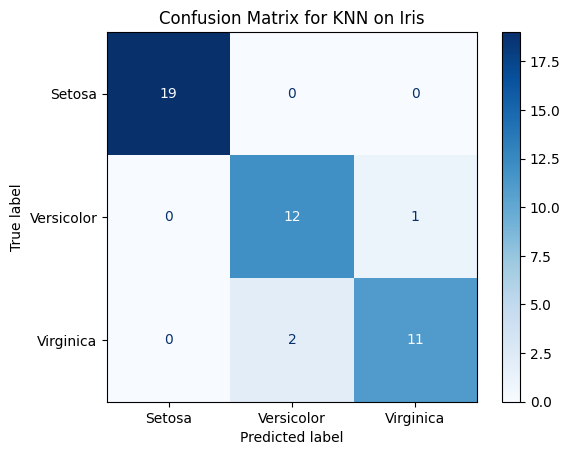

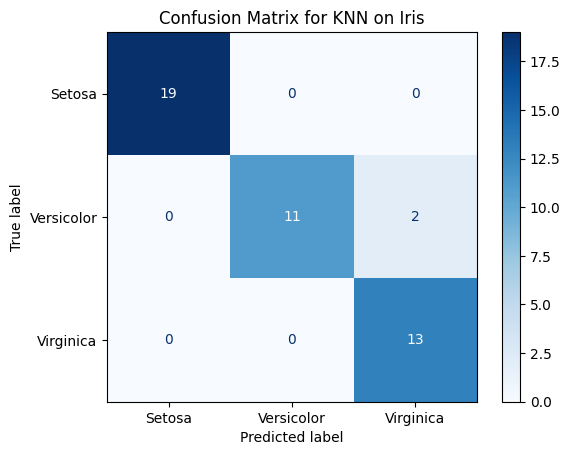

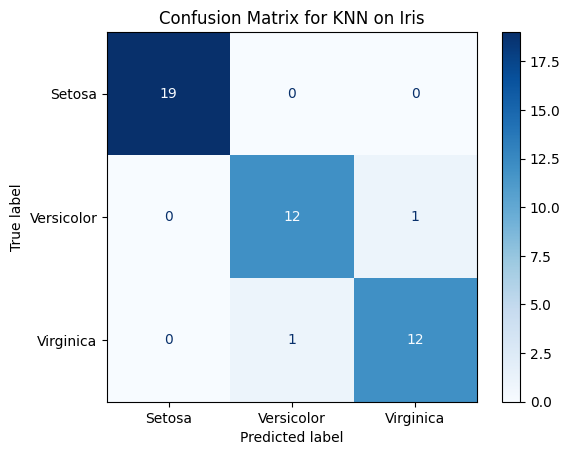

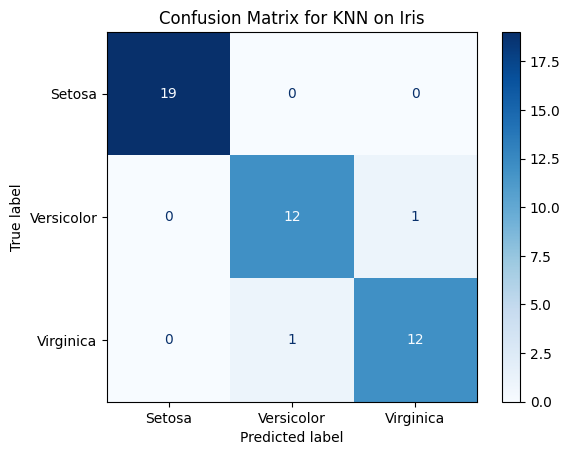

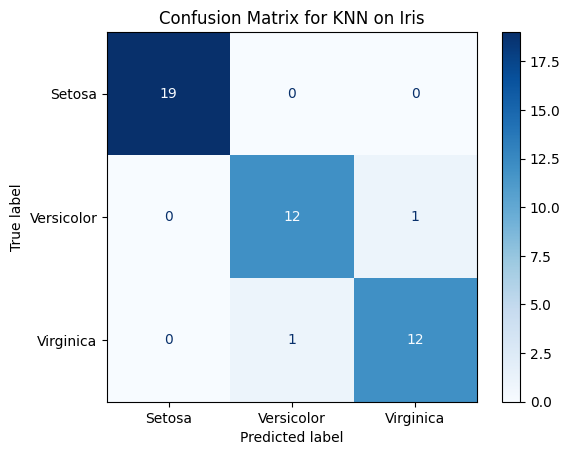

In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

classifier = KNeighborsClassifier()
k_values = [1, 3, 5, 7, 9]
accuracies = []
for k in k_values:
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier.fit(x_train_pca, y_train)
    y_pred = classifier.predict(x_test_pca)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    
    # Create confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Display confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Setosa', 'Versicolor', 'Virginica'])
    disp.plot(cmap='Blues')
    plt.title("Confusion Matrix for KNN on Iris")
    plt.show()

In [20]:
accuracies

[0.9333333333333333,
 0.9555555555555556,
 0.9555555555555556,
 0.9555555555555556,
 0.9555555555555556]

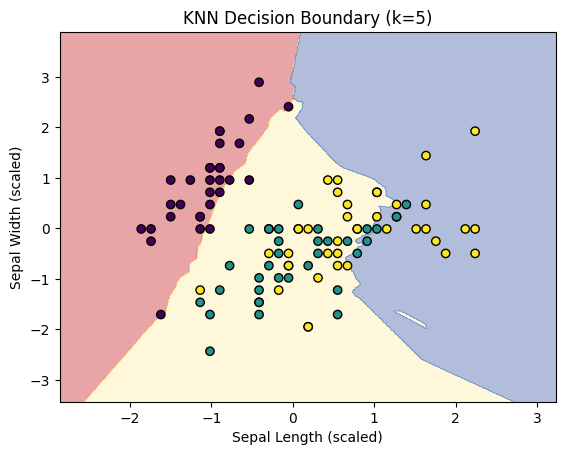

In [21]:
# Create meshgrid
x_min, x_max = x_train[:, 0].min() - 1, x_train[:, 0].max() + 1
y_min, y_max = x_train[:, 1].min() - 1, x_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Predict for meshgrid points
Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.RdYlBu)
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, edgecolors='k')
plt.title("KNN Decision Boundary (k=5)")
plt.xlabel('Sepal Length (scaled)')
plt.ylabel('Sepal Width (scaled)')
plt.show()